In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv("../datasets/word2vec/embedding/wikipedia_color_names.csv")

In [4]:
data.head()

,Name,Hex (24 bit),Red (8 bit),Green (8 bit),Blue (8 bit),Hue (degrees),HSL.S (%),"HSL.L (%), HSV.S (%), HSV.V (%)"
0,Absolute zero,#0048BA,0,72,186,217.0,100.0,37.0
1,Acid green,#B0BF1A,176,191,26,65.0,76.0,43.0
2,Aero,#7CB9E8,124,185,232,206.0,70.0,70.0
3,Aero blue,#C9FFE5,201,255,229,151.0,100.0,89.0
4,African violet,#B284BE,178,132,190,288.0,31.0,63.0


In [14]:
X, y = data.iloc[:, 2:5].values, data.iloc[:, 0].values

In [36]:
color = X[y == "Pink"]

distances = np.sum((X - color) ** 2, axis=1)

near = distances.argsort()[:10]

y[near]

colors_rgb = X[near]

In [41]:
colors_rgb.shape

(10, 3)

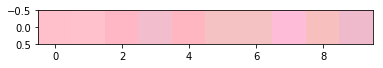

In [44]:
plt.imshow(colors_rgb.reshape(1, -1, 3))

In [73]:
c1, c2, c3 = "Burnt orange", "Pink", "Blue"

In [74]:
relation = X[y == c1] - X[y == c2]

In [75]:
relation

array([[ -51, -107, -203]])

In [76]:
output = X[y == c3] - relation

In [77]:
output

array([[ 51, 107, 458]])

In [78]:
X[y == c3]

array([[  0,   0, 255]])

In [79]:
def near_colors(color):
    distances = np.sum((X - color) ** 2, axis=1)
    near = distances.argsort()[:10]
    
    return y[near], X[near]

In [80]:
y_col, x_col = near_colors(output)

([<matplotlib.axis.YTick at 0x11fb0f908>,
 <a list of 10 Text yticklabel objects>)

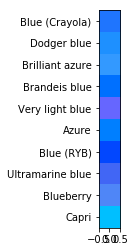

In [81]:
plt.imshow(x_col.reshape(-1, 1, 3))
plt.yticks(range(10), y_col)